In [1]:
import qiskit
from qiskit import *
import pylatexenc
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
#import qiskit.tools.jupyter
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer.noise import NoiseModel

In [2]:
sim = AerSimulator()

In [11]:
class Circuit():
    def run(self, qc, sim, shots=1024, memory=False):
        '''
        This function takes a circuit and simulator as input, compiles the circuit, runs the simulator and then plots the results.
        '''
        compiled_circuit = transpile(qc, sim)
        sim_result = sim.run(compiled_circuit, shots=shots, memory=memory).result() #default shots=1024
        return sim_result
    def display(self, sim_result):
        res = sim_result.get_counts()
        return plot_histogram(res)

In [12]:
circ = Circuit()

 ## Part 1:Implementation of Iterative Phase Estimation algorithm

### 1. Understand a circuit with non-unitary operations.

#### &#128211;Step B. Complete the rest of the circuit so that the auxiliary qubit ( top qubit ) after the reset would be in the state $\frac{1}{\sqrt2}(|0\rangle + e^{-i\frac{\pi}{2}}|1\rangle)$ if the value of the classical bit is one or remains zero state otherwise.

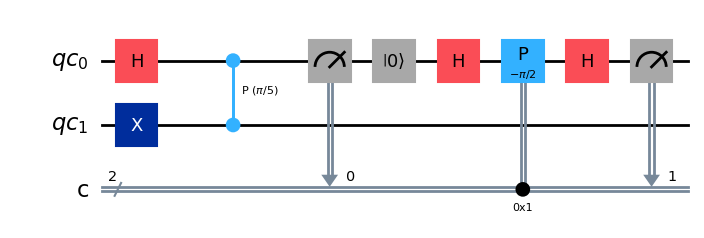

In [9]:
q = QuantumRegister(2, name="qc")
c = ClassicalRegister(2,  name="c")

qc1 = QuantumCircuit(q,c)
qc1.h(q[0])
qc1.x(q[1])
qc1.cp(np.pi/5, q[0], q[1])
qc1.measure(q[0], c[0])
qc1.reset(q[0])

###### your code goes here #####

qc1.h(q[0])
qc1.p(-np.pi/2, q[0]).c_if(c,1)

##########################
qc1.h(q[0])
qc1.measure(q[0],c[1])

qc1.draw(output="mpl")

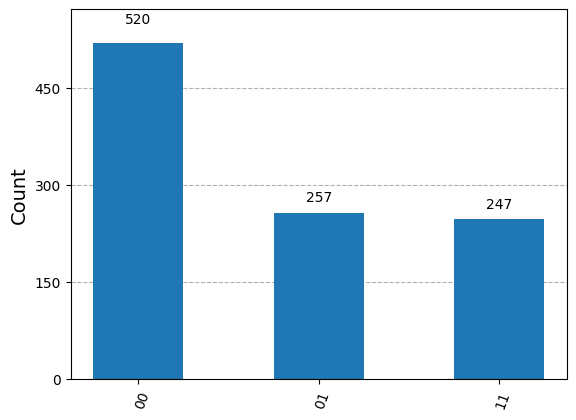

In [14]:
circ.display(circ.run(qc1, sim))

### 3. Estimate the phase of the $T$-gate implementing IPE algorithm.

#### &#128211;Step A. Obtain the least significant phase bit of the $T$-gate by setting up the circuit <code>T_x3</code> properly and assign the value to the variable <code>x_3</code>.

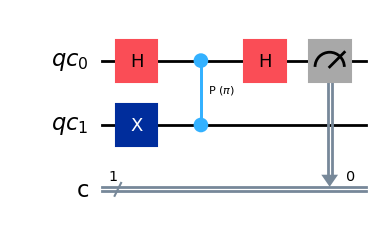

In [93]:
q = QuantumRegister(2, name="qc")
c = ClassicalRegister(1, name="c")

T_x3 = QuantumCircuit(q,c)

########## your code goes here #######

##1 Initialization

T_x3.h(q[0])
T_x3.x(q[1])

##2 Apply control-U operator as many times as needed to get the least significant phase bit

t_angle = np.pi/4
k=2
cphase_angle = t_angle * 2**k
T_x3.cp(cphase_angle, q[0], q[1])

##3 measure the anscillar qubit in x-basis

T_x3.h(q[0])
T_x3.measure(q[0], c[0])

T_x3.draw("mpl")

In [94]:
########## Simulate the circuit and assign the output value to the variable 'x_3'
job = circ.run(T_x3, sim, shots=1, memory=True)
x_3 = int(job.get_memory()[0])
print(x_3)

1


#### &#128211;Step B. Extract the middle phase bit of the $T$-gate by creating the circuit <code>T_x2</code> with phase correction using <code>x_3</code> value from Step A. Assign the outcome bit to the variable <code>x_2</code>.

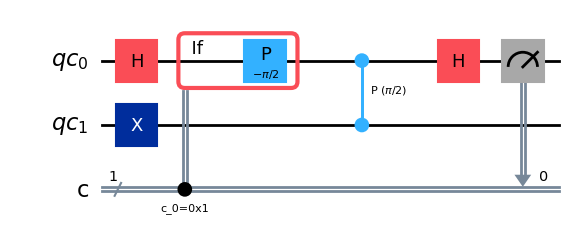

In [95]:
q = QuantumRegister(2, name="qc")
c = ClassicalRegister(1, name="c")

T_x2 = QuantumCircuit(q,c)

########### your code goes here ##########

##1 Initialization

T_x2.h(q[0])
T_x2.x(q[1])

##2 phase correction

with T_x2.if_test((c[0], x_3)):
    T_x2.p(-np.pi / 2, q[0])

##3 Apply control-U operator as many times as needed 

t_angle = np.pi/4
k=1
cphase_angle = t_angle * 2**k
T_x2.cp(cphase_angle, q[0], q[1])

##4 measure the anscillar qubit in x-basis

T_x2.h(q[0])
T_x2.measure(q[0], c[0])

T_x2.draw("mpl")

In [96]:
######## Simulate the circuit and assign the output value to the variable 'x_2' 
job = circ.run(T_x2, sim, shots=1, memory=True)
x_2 = int(job.get_memory()[0])
print(x_2)

0


#### &#128211;Step C. Find the most significant phase bit of the $T$-gate and assign it to the variable <code>x_1</code>. 

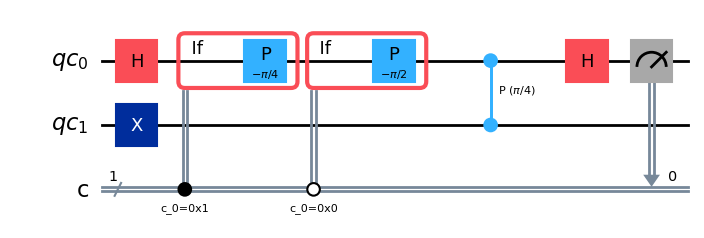

In [97]:
q = QuantumRegister(2, name="qc")
c = ClassicalRegister(1,name="c")

T_x1 = QuantumCircuit(q,c)

########### your code goes here #########

##1 Initialization

T_x1.h(q[0])
T_x1.x(q[1])

##2 phase correction

with T_x1.if_test((c[0], x_3)):
     T_x1.p(-np.pi / 4, q[0])
with T_x1.if_test((c[0], x_2)):
     T_x1.p(-np.pi / 2, q[0])

##3 Apply control-U operator as many times as needed to get the least significant phase bit

t_angle = np.pi/4
k=0
cphase_angle = t_angle * 2**k
T_x1.cp(cphase_angle, q[0], q[1])

##4 measure the anscillar qubit in x-basis

T_x1.h(q[0])
T_x1.measure(q[0], c[0])

T_x1.draw("mpl")

In [98]:
########## Simulate the circuit and assign the output value to the variable 'x_1' 
job = circ.run(T_x1, sim, shots=1, memory=True)
x_1 = int(job.get_memory()[0])
print(x_1)

0


In [100]:
T_phase_bits = '{}{}{}'.format(x_1, x_2, x_3) 
T_phase_bits == '001'

True

#### &#128211;Step D. Construct the full IPE circuit and pass it to the variable <code>qc_T</code> ; Put the all steps that you performed into one circuit utilizing conditional operations and reset. 

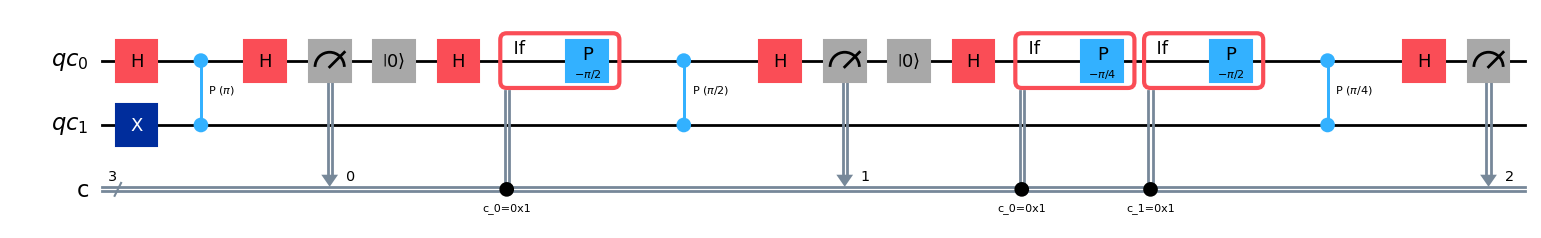

In [74]:
##### your code goes here ######
q = QuantumRegister(2, name="qc")
c = ClassicalRegister(3,name="c")

qc_T = QuantumCircuit(q,c)

qc_T.h(q[0])
qc_T.x(q[1])

t_angle = np.pi / 4
k = 2
cphase_angle = t_angle * 2**k
qc_T.cp(cphase_angle, q[0], q[1])

qc_T.h(q[0])
qc_T.measure(q[0], c[0])

qc_T.reset(q[0])
qc_T.h(q[0])

with qc_T.if_test((c[0], 1)):
    qc_T.p(-np.pi / 2, q[0])

k = 1
cphase_angle = t_angle * 2**k
qc_T.cp(cphase_angle, q[0], q[1])

qc_T.h(q[0])
qc_T.measure(q[0], c[1])

qc_T.reset(q[0])
qc_T.h(q[0])

with qc_T.if_test((c[0], 1)):
    qc_T.p(-np.pi / 4, q[0])
with qc_T.if_test((c[1], 1)):
    qc_T.p(-np.pi / 2, q[0])

k = 0
cphase_angle = t_angle * 2**k
qc_T.cp(cphase_angle, q[0], q[1])

qc_T.h(q[0])
qc_T.measure(q[0], c[2])

################
qc_T.draw("mpl")

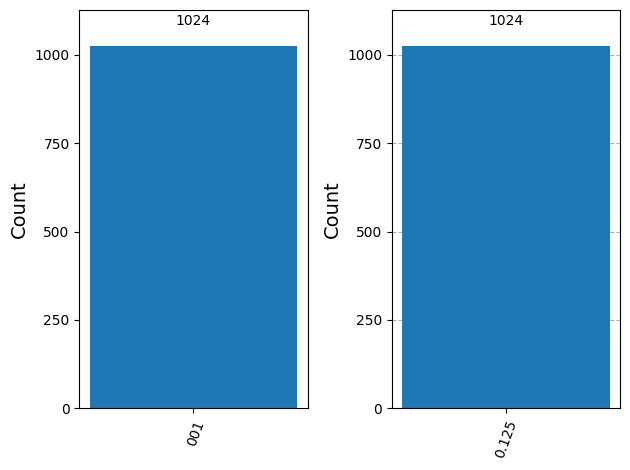

In [75]:
count0 = circ.run(qc_T, sim).get_counts()
n=3
key_new = [str(int(key,2)/2**n) for key in list(count0.keys())]
count1 = dict(zip(key_new, count0.values()))

fig, ax = plt.subplots(1,2)
plot_histogram(count0, ax=ax[0])
plot_histogram(count1, ax=ax[1])
plt.tight_layout()

#### &#128211;Step A. How many classical registers is needed? Assign the value to the variable <code>n</code>.  

In [101]:
## your answer goes here
n = 4

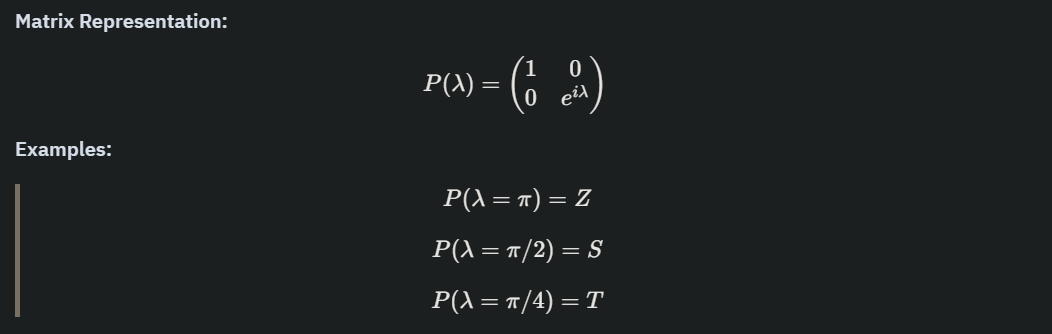

#### &#128211;Step B. Construct the IPE circuit in the following cell. 

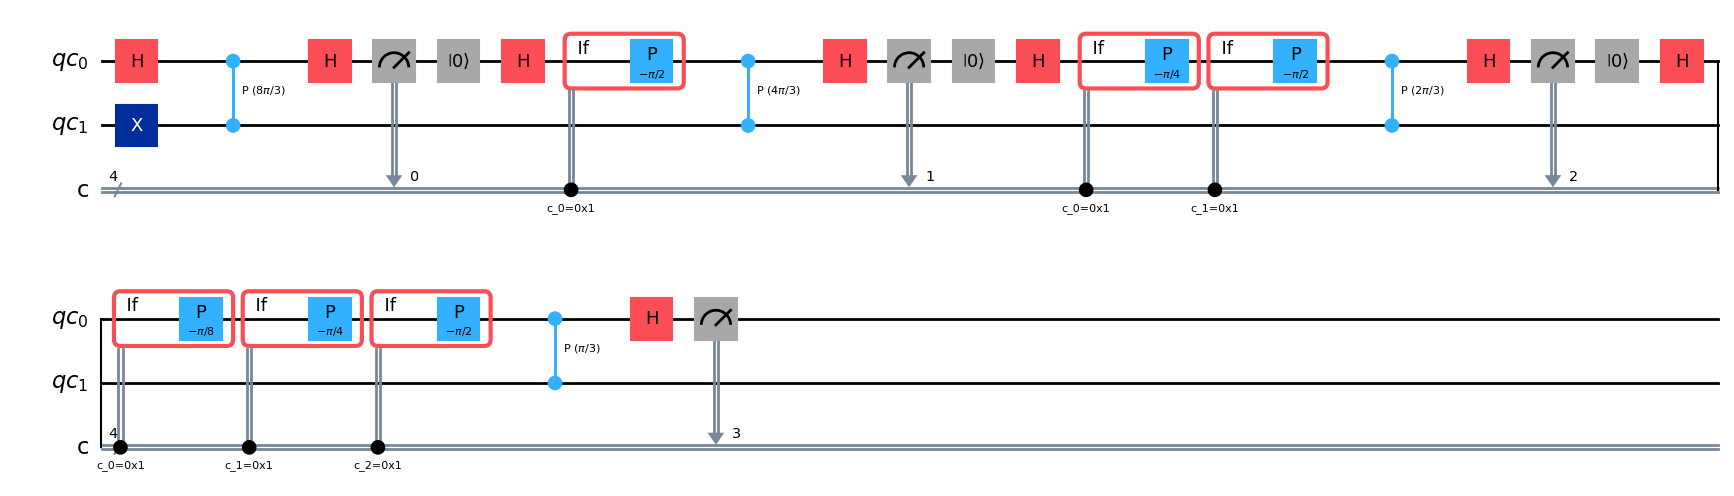

In [105]:
q = QuantumRegister(2, name="qc")
c = ClassicalRegister(n, name="c")

IPE = QuantumCircuit(q,c)

########## your code goes here ############

IPE.h(q[0])
IPE.x(q[1])

p_angle = np.pi / 3
k = 3
cphase_angle = p_angle * 2**k
IPE.cp(cphase_angle, q[0], q[1])

IPE.h(q[0])
IPE.measure(q[0], c[0])

IPE.reset(q[0])
IPE.h(q[0])

with IPE.if_test((c[0], 1)):
    IPE.p(-np.pi / 2, q[0])

k = 2
cphase_angle = p_angle * 2**k
IPE.cp(cphase_angle, q[0], q[1])

IPE.h(q[0])
IPE.measure(q[0], c[1])

IPE.reset(q[0])
IPE.h(q[0])

with IPE.if_test((c[0], 1)):
    IPE.p(-np.pi / 4, q[0])
with IPE.if_test((c[1], 1)):
    IPE.p(-np.pi / 2, q[0])

k = 1
cphase_angle = p_angle * 2**k
IPE.cp(cphase_angle, q[0], q[1])

IPE.h(q[0])
IPE.measure(q[0], c[2])

IPE.reset(q[0])
IPE.h(q[0])

with IPE.if_test((c[0], 1)):
    IPE.p(-np.pi / 8, q[0])
with IPE.if_test((c[1], 1)):
    IPE.p(-np.pi / 4, q[0])
with IPE.if_test((c[2], 1)):
    IPE.p(-np.pi / 2, q[0])

k = 0
cphase_angle = p_angle * 2**k
IPE.cp(cphase_angle, q[0], q[1])

IPE.h(q[0])
IPE.measure(q[0], c[3])
#####################
IPE.draw("mpl")

#### Step C. Run the cell below to create the QPE circuit for the comparison. 

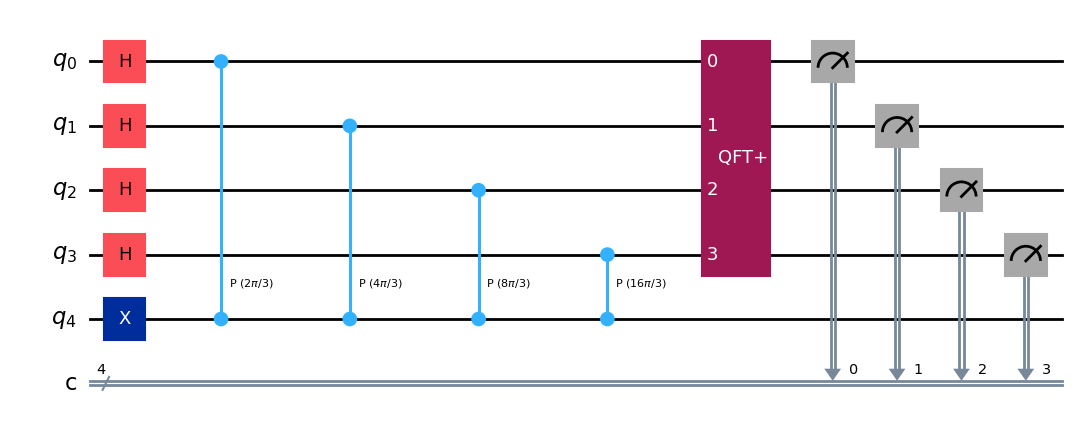

In [106]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit


# define the parameters
t, psi = 4, 1/3*np.pi*2

# building a circuit
QPE = QuantumCircuit(t+1,t)
QPE.h(range(t))
QPE.x(t)
for idx in range(t):
    QPE.cp(psi*2**idx, idx, t)
    
qft_dag = qft(t).to_gate().inverse()
qft_dag.label = 'QFT+'
QPE.append(qft_dag, range(t))
QPE.measure(range(t), range(t))

QPE.draw("mpl")

### Transpile the IPE circuit

In [193]:
from qiskit_ibm_runtime.fake_provider import FakeAthensV2, FakeKyiv, FakeKyoto
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="dfafbcbd3d49a75961ff8ff8c7dcc565c536954b87b224afe5294631389e5dc6e32362b0ea5d2747c3f671a3d0ca84b40d6126b88b5446c40adf218ba44cccd9")

In [194]:
# service = QiskitRuntimeService()
# backend = service.backend("ibm_kyiv")

# service = QiskitRuntimeService(instance='ibm-q/open/main')
# backend = service.backend("fake_kyiv")
# print("OK ✅")

backend = FakeKyoto()

In [237]:
######## your code to transpile IPE circuit goes here ########

num = 500
IPE_trans = transpile([IPE]*num, backend, optimization_level=3)
IPE_trans_depth = np.array([IPE_trans[idx].depth() for idx in range(num)])

#####################
print("OK ✅")

OK ✅


In [238]:
print(IPE_trans_depth.max(), IPE_trans_depth.min())

65 63


In [239]:
num = 500
QPE_trans = transpile([QPE]*num, backend, optimization_level=3)
QPE_trans_depth = np.array([QPE_trans[idx].depth() for idx in range(num)])
print(min(QPE_trans_depth), max(QPE_trans_depth))
best_arg = np.argmin(QPE_trans_depth)
QPE_trans_best = QPE_trans[best_arg]
print("OK ✅")

106 141
OK ✅


In [258]:
shots=20000
noise_model = NoiseModel.from_backend(backend)
counts=[-1, -1]

In [259]:
counts[0] = sim.run(IPE_trans, noise_model=noise_model, shots=shots).result().get_counts()
counts[1] = sim.run(QPE_trans_best, noise_model=noise_model, shots=shots).result().get_counts()
print("OK ✅")

OK ✅


In [246]:
from qiskit.quantum_info import Statevector

QPE_exact = QuantumCircuit(t+1)
QPE_exact.h(range(t))
QPE_exact.x(t)
for idx in range(t):
    QPE_exact.cp(psi*2**idx, idx, t)
    
qft_dag = qft(t).to_gate().inverse()
qft_dag.label = 'QFT+'
QPE_exact.append(qft_dag, range(t))

#QPE_exact.draw('mpl')

state = Statevector.from_instruction(QPE_exact)
pmf = state.probabilities_dict(range(4))

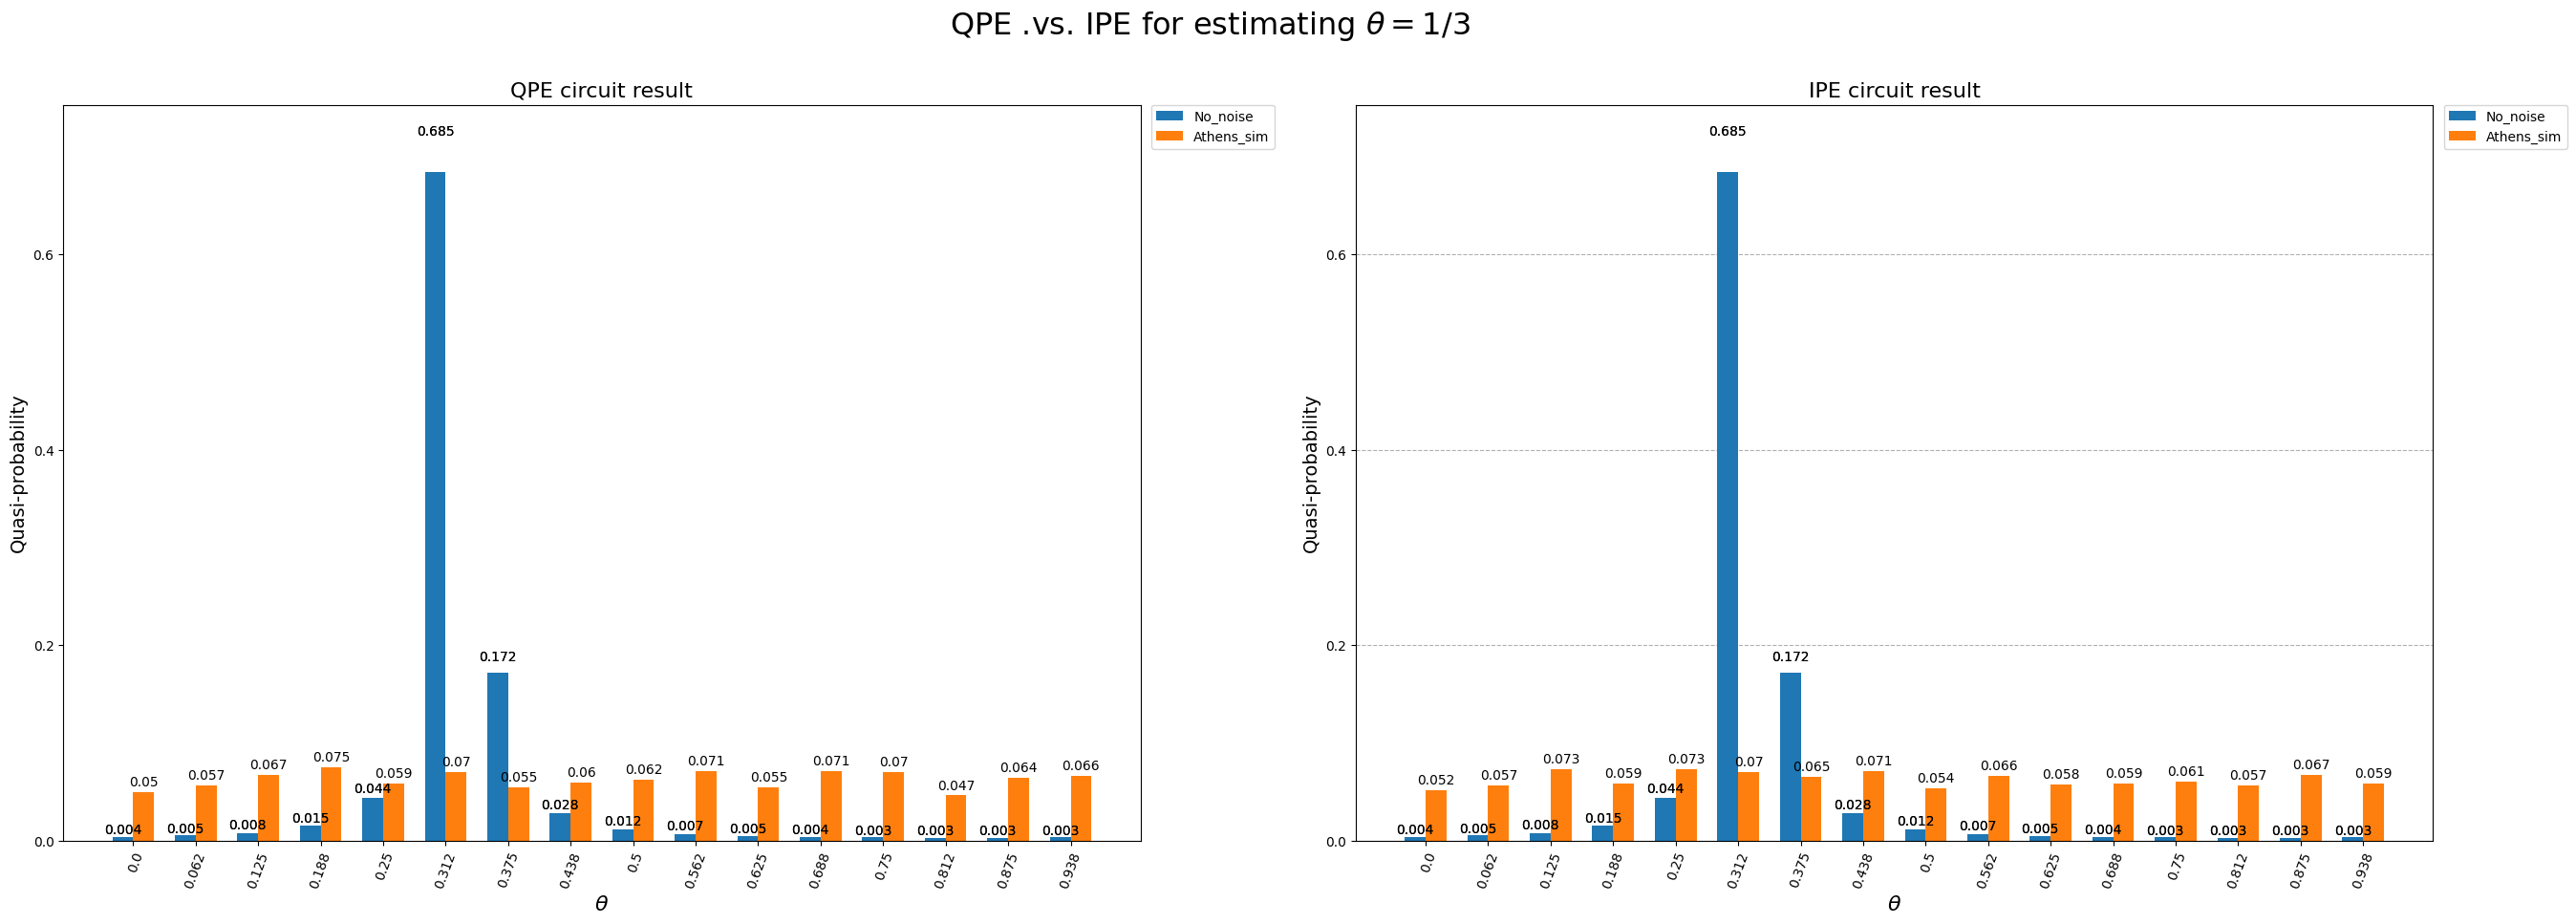

In [273]:
def count_new(count):
    phi_est = np.array([round(int(key, 2)/2**t, 3) for key in list(count.keys())])
    key_new = list(map(str, phi_est))
    count_new = dict(zip(key_new, count.values()))
    return count_new

pmf_new = count_new(pmf)
count_IPE = count_new(counts[0][499])
count_QPE = count_new(counts[1])

fig, ax = plt.subplots(1, 2, figsize=(32,10))
fig.suptitle('QPE .vs. IPE for estimating $\\theta=1/3$', fontsize=23)
plot_histogram([pmf_new, count_QPE], ax=ax[0], legend=['No_noise', 'Athens_sim'])
plot_histogram([pmf_new, count_IPE], ax=ax[1], legend=['No_noise', 'Athens_sim'])
ax[0].set_title('QPE circuit result', fontsize=16)
ax[0].set_xlabel('$\\theta$', fontsize=16)
ax[1].set_title('IPE circuit result', fontsize=16)
ax[1].set_xlabel('$\\theta$', fontsize=16)
plt.show()